In [1]:
import yaml
import numpy as np
import thecov.covariance
import thecov.geometry
import thecov.base
import thecov.utils

import matplotlib.pyplot as plt
from cosmoprimo.fiducial import DESI
from mockfactory import Catalog, utils
from pypower import CatalogFFTPower, PowerSpectrumStatistics
import os
import logging
import time

In [2]:
pk_dir='/global/cfs/cdirs/desi/users/uendert/desi_blinding/double_blinded/LSScats/v0.6/blinded/pk/'
tracer='LRG'
region='GCcomb'
zmin=0.4
zmax=0.6

In [3]:
pk = PowerSpectrumStatistics.load(os.path.join(pk_dir, f'pkpoles_{tracer}_{region}_{zmin}_{zmax}_default_FKP_lin.npy'))
pk = pk[:400:5]
k = pk.k
shotnoise = pk.shotnoise
P = pk(ell=[0, 2, 4], remove_shotnoise=True, complex=False)
P0, P2, P4 = P[0, :], P[1, :], P[2, :]
len(P0)

80

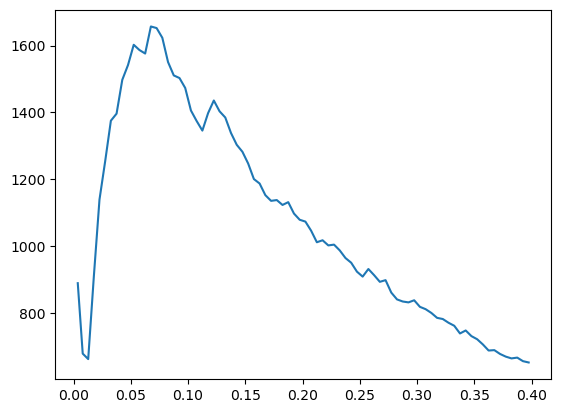

In [4]:
plt.plot(k, k * P0, label='P0')

In [5]:
covariance = thecov.covariance.GaussianCovariance(geometry=None)
covariance.set_kbins(0, 0.4, 0.005)
covariance.set_pk(P0, 0, has_shotnoise=False)
covariance.set_pk(P2, 2)
covariance.set_pk(P4, 4)

covariance.set_full_cov(np.loadtxt(f'../cov_gaussian_prerec_{tracer}_{region}_{zmin}_{zmax}.txt'))

(<Figure size 2000x1000 with 6 Axes>,
 array([<Axes: xlabel='k [h/Mpc]', ylabel='$C_{00}(k,k)/P_0(k)^2$'>,
        <Axes: xlabel='k [h/Mpc]', ylabel='$C_{22}(k,k)/P_0(k)^2$'>,
        <Axes: xlabel='k [h/Mpc]', ylabel='$C_{44}(k,k)/P_0(k)^2$'>,
        <Axes: xlabel='k [h/Mpc]', ylabel='$C_{02}(k,k)/P_0(k)^2$'>,
        <Axes: xlabel='k [h/Mpc]', ylabel='$C_{04}(k,k)/P_0(k)^2$'>,
        <Axes: xlabel='k [h/Mpc]', ylabel='$C_{24}(k,k)/P_0(k)^2$'>],
       dtype=object),
 array([<Axes: xlabel='k [h/Mpc]', ylabel='$C_{00}(k,k)/P_0(k)^2$'>,
        <Axes: xlabel='k [h/Mpc]', ylabel='$C_{22}(k,k)/P_0(k)^2$'>,
        <Axes: xlabel='k [h/Mpc]', ylabel='$C_{44}(k,k)/P_0(k)^2$'>,
        <Axes: xlabel='k [h/Mpc]', ylabel='$C_{02}(k,k)/P_0(k)^2$'>,
        <Axes: xlabel='k [h/Mpc]', ylabel='$C_{04}(k,k)/P_0(k)^2$'>,
        <Axes: xlabel='k [h/Mpc]', ylabel='$C_{24}(k,k)/P_0(k)^2$'>],
       dtype=object))

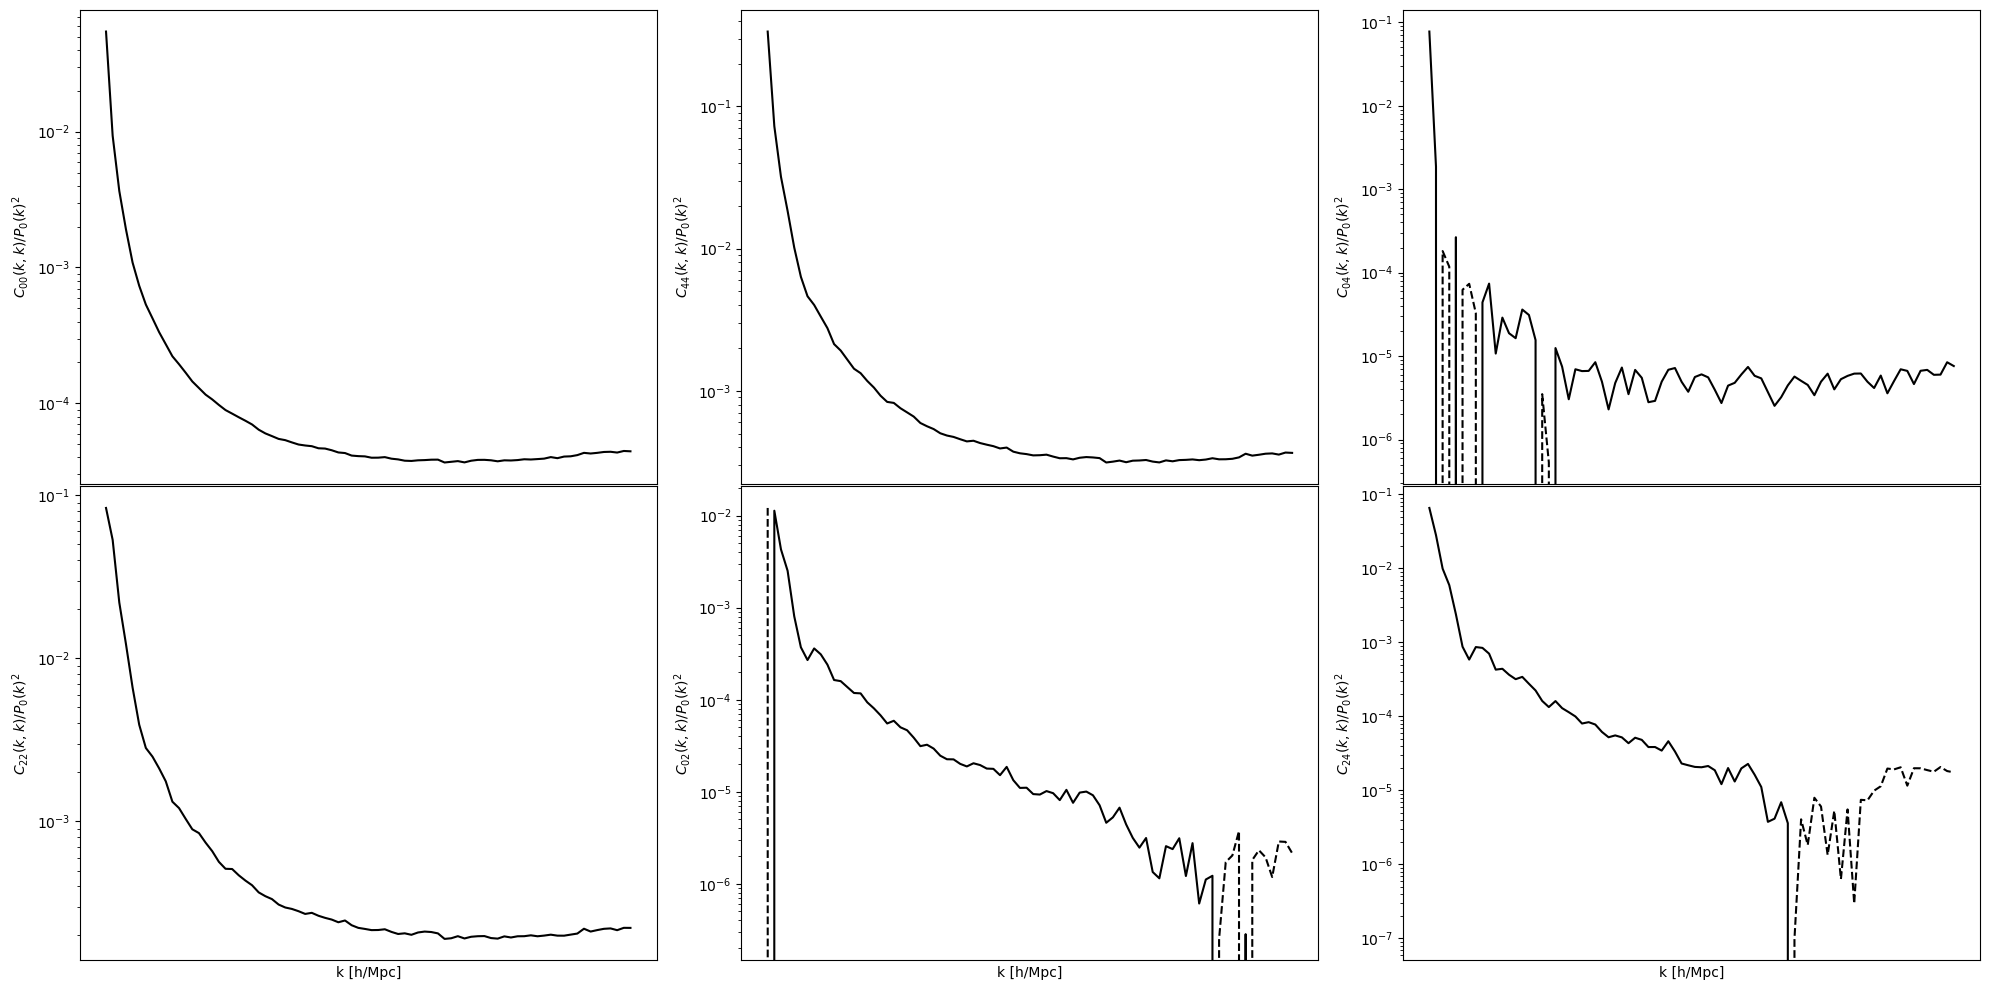

In [6]:
thecov.utils.plot_cov_diag(covariance)

(<Figure size 1200x1000 with 2 Axes>,
 <Axes: xlabel='k  [h/Mpc]', ylabel='k  [h/Mpc]'>,
 <matplotlib.colorbar.Colorbar at 0x7fa7282ff310>)

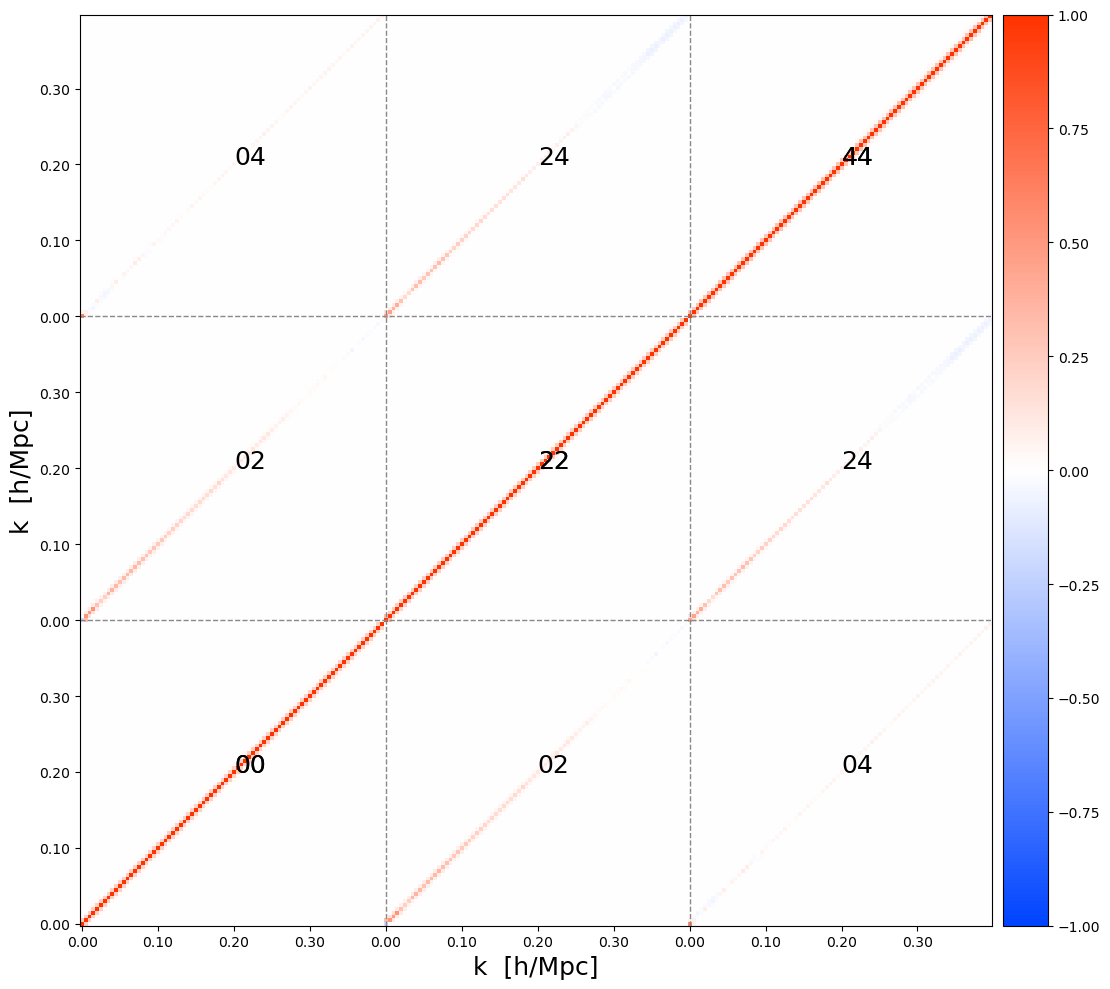

In [7]:
thecov.utils.plot_cov(covariance)